<a href="https://colab.research.google.com/github/dibdin/malebirthcontrol/blob/main/Part3_Compare_Regressors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 3] Comparing Regressors**

original code credit: Chanin Nantasenamat

['Data Professor' YouTube channel](http://youtube.com/dataprofessor)



## **1. Import libraries**

In [ ]:
! pip install lazypredict

In [ ]:

import pandas as pd

import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


## **2. Load the data set**


In [ ]:
! wget https://raw.githubusercontent.com/dibdin/malebirthcontrol/main/bioactivity_data_spem1_correct_combined_pubchem_fp.csv

--2021-09-24 20:59:51--  https://raw.githubusercontent.com/dibdin/HIV-bioactivity-project/main/bioactivity_data_CCR5_correct_combined_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4714522 (4.5M) [text/plain]
Saving to: ‘bioactivity_data_CCR5_correct_combined_pubchem_fp.csv.1’

bioactivity_data_CC 100%[===================>]   4.50M  --.-KB/s    in 0.09s   

2021-09-24 20:59:51 (48.2 MB/s) - ‘bioactivity_data_CCR5_correct_combined_pubchem_fp.csv.1’ saved [4714522/4714522]



In [ ]:
df = pd.read_csv('bioactivity_data_spem1_correct_combined_pubchem_fp.csv')

In [ ]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [ ]:
# Examine X dimension
X.shape

(2644, 881)

In [ ]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(2644, 154)

In [ ]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## **4. Compare ML algorithms**

In [ ]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
train,test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:33<00:00,  1.27it/s]


In [ ]:
# Performance table of the training set (80% subset)
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.49,0.64,0.84,0.31
HistGradientBoostingRegressor,0.49,0.64,0.84,2.48
RandomForestRegressor,0.49,0.64,0.85,2.66
BaggingRegressor,0.48,0.64,0.85,0.33
XGBRegressor,0.45,0.61,0.88,1.39
NuSVR,0.41,0.58,0.91,1.30
KNeighborsRegressor,0.40,0.58,0.91,0.49
MLPRegressor,0.40,0.58,0.92,4.21
SVR,0.40,0.58,0.92,1.53


In [ ]:
# Performance table of the test set (20% subset)
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.49,0.64,0.84,0.31
HistGradientBoostingRegressor,0.49,0.64,0.84,2.48
RandomForestRegressor,0.49,0.64,0.85,2.66
BaggingRegressor,0.48,0.64,0.85,0.33
XGBRegressor,0.45,0.61,0.88,1.39
NuSVR,0.41,0.58,0.91,1.30
KNeighborsRegressor,0.40,0.58,0.91,0.49
MLPRegressor,0.40,0.58,0.92,4.21
SVR,0.40,0.58,0.92,1.53


# models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)
clf.fit(X_train, Y_train, X_test, Y_test)

predictions_train

In [ ]:
# Performance table of the test set (20% subset)
predictions_test

NameError: ignored

## **5. Data visualization of model performance**

[(0.0, 1.0)]

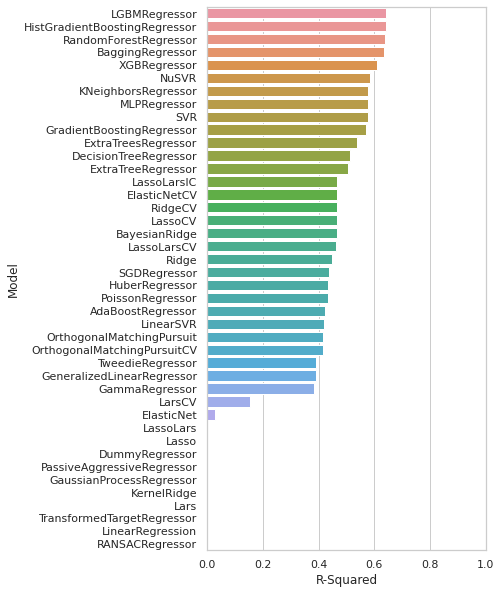

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared", data=train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

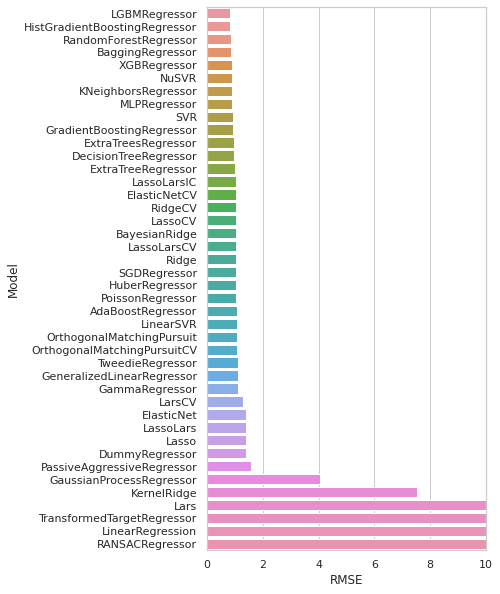

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

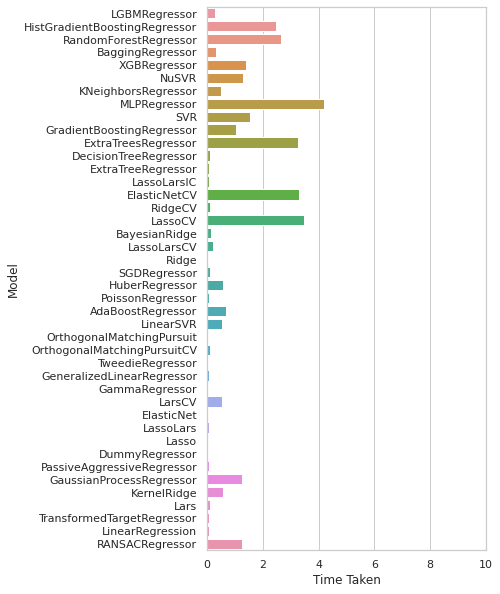

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="Time Taken", data=train)
ax.set(xlim=(0, 10))